In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [9]:
data = pd.read_csv('c:/users/ACER/desktop/winequality-red.csv')
data.head()

,acides_fija,acides_volatil,acido_citrico,azucar_residual,cloruros,dioxido_de_azufre,dioxido_de_azufre_total,densidad,pH,sulfatos,alcohol,calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
data.shape

(1599, 12)

In [13]:
data.describe()

,acides_fija,acides_volatil,acido_citrico,azucar_residual,cloruros,dioxido_de_azufre,dioxido_de_azufre_total,densidad,pH,sulfatos,alcohol,calidad
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
data.isna().sum()

acides_fija                0
acides_volatil             0
acido_citrico              0
azucar_residual            0
cloruros                   0
dioxido_de_azufre          0
dioxido_de_azufre_total    0
densidad                   0
pH                         0
sulfatos                   0
alcohol                    0
calidad                    0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

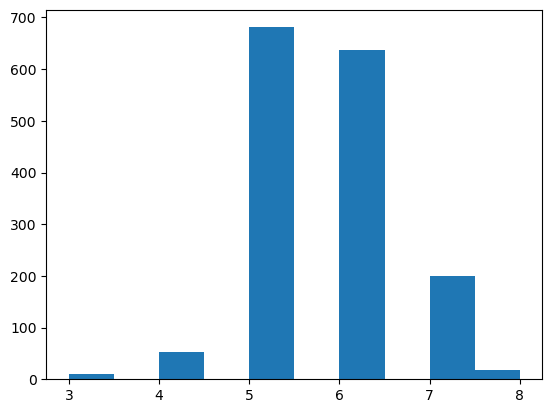

In [23]:
plt.hist(data.calidad)

<Axes: xlabel='pH', ylabel='sulfatos'>

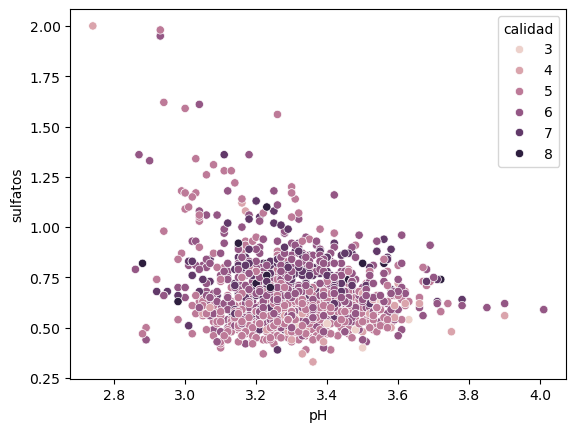

In [25]:
sns.scatterplot(x = "pH", y = "sulfatos", hue = "calidad", data = data)

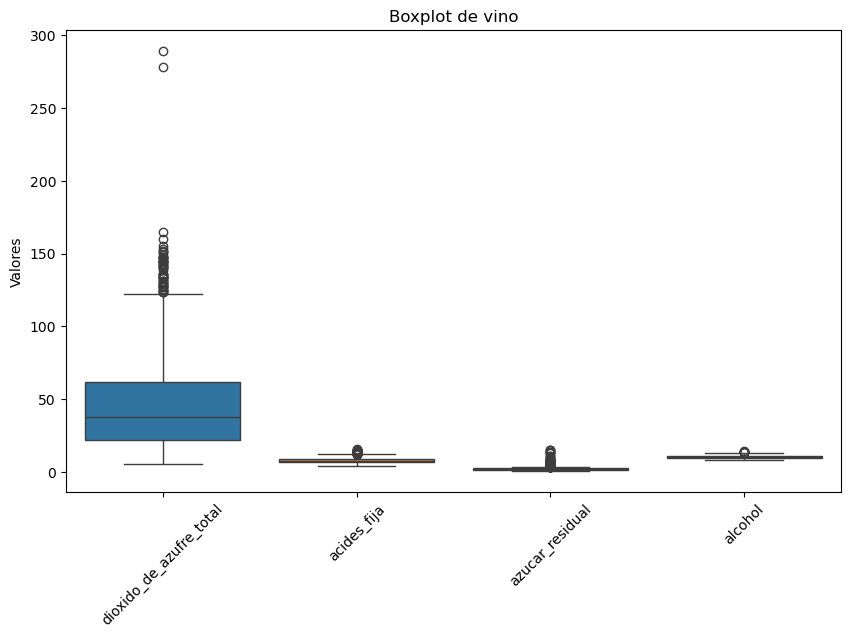

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['dioxido_de_azufre_total', 'acides_fija', 'azucar_residual', 'alcohol']])
plt.xticks(rotation=45)
plt.title('Boxplot de vino')
plt.ylabel('Valores')
plt.show()

In [35]:
predictors_col = ["dioxido_de_azufre_total", "acides_fija", "azucar_residual", "alcohol"]
target_col = ['calidad']

In [37]:
predictors = data[predictors_col]
target = data[target_col]

In [39]:
predictors

,dioxido_de_azufre_total,acides_fija,azucar_residual,alcohol
0,34.0,7.4,1.9,9.4
1,67.0,7.8,2.6,9.8
2,54.0,7.8,2.3,9.8
3,60.0,11.2,1.9,9.8
4,34.0,7.4,1.9,9.4
...,...,...,...,...
1594,44.0,6.2,2.0,10.5
1595,51.0,5.9,2.2,11.2
1596,40.0,6.3,2.3,11.0
1597,44.0,5.9,2.0,10.2


In [41]:
target

,calidad
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [43]:
corr = predictors.corr()
corr

,dioxido_de_azufre_total,acides_fija,azucar_residual,alcohol
dioxido_de_azufre_total,1.000000,-0.113181,0.203028,-0.205654
acides_fija,-0.113181,1.000000,0.114777,-0.061668
azucar_residual,0.203028,0.114777,1.000000,0.042075
alcohol,-0.205654,-0.061668,0.042075,1.000000


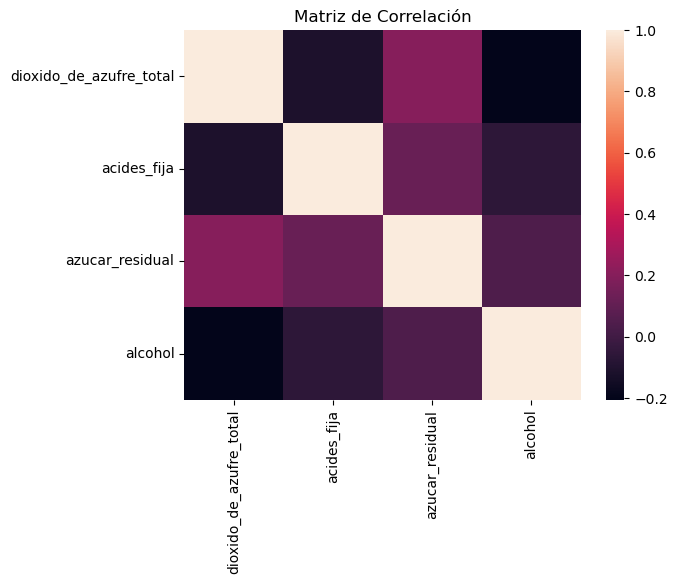

In [45]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [207]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=13)

In [209]:
tree = DecisionTreeClassifier()

In [211]:
arbol = tree.fit(X_train, y_train)

[Text(0.6485873909883721, 0.9772727272727273, 'x[3] <= 10.525\ngini = 0.645\nsamples = 1119\nvalue = [8, 40, 470, 450, 140, 11]'),
 Text(0.4586184073920266, 0.9318181818181818, 'x[0] <= 98.5\ngini = 0.543\nsamples = 677\nvalue = [5.0, 26.0, 395.0, 228.0, 23.0, 0.0]'),
 Text(0.5536028991901993, 0.9545454545454546, 'True  '),
 Text(0.36972850913621264, 0.8863636363636364, 'x[1] <= 9.95\ngini = 0.565\nsamples = 603\nvalue = [5, 25, 328, 222, 23, 0]'),
 Text(0.25814472591362125, 0.8409090909090909, 'x[3] <= 9.85\ngini = 0.544\nsamples = 501\nvalue = [4.0, 22.0, 293.0, 167.0, 15.0, 0.0]'),
 Text(0.14115448504983388, 0.7954545454545454, 'x[1] <= 9.15\ngini = 0.493\nsamples = 330\nvalue = [2, 14, 214, 96, 4, 0]'),
 Text(0.049750830564784056, 0.75, 'x[3] <= 9.075\ngini = 0.512\nsamples = 299\nvalue = [2, 13, 185, 96, 3, 0]'),
 Text(0.013289036544850499, 0.7045454545454546, 'x[0] <= 59.5\ngini = 0.512\nsamples = 22\nvalue = [0, 2, 6, 14, 0, 0]'),
 Text(0.0106312292358804, 0.6590909090909091, 'x

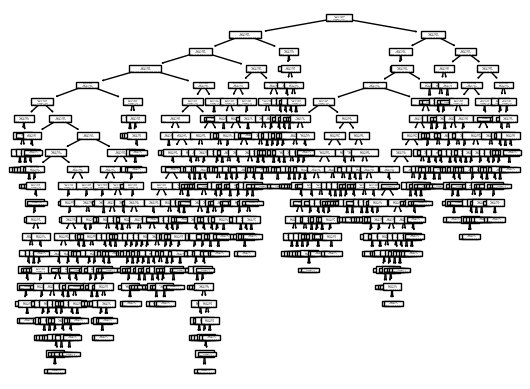

In [213]:
plot_tree(arbol)

In [214]:
predicciones = arbol.predict(X_test)

In [215]:
predicciones

array([7, 7, 5, 5, 6, 5, 6, 5, 5, 5, 7, 6, 5, 6, 7, 5, 6, 8, 6, 7, 5, 6,
       6, 5, 6, 5, 5, 4, 7, 8, 6, 6, 5, 6, 5, 4, 6, 6, 4, 6, 5, 5, 6, 6,
       5, 6, 6, 7, 5, 6, 5, 5, 6, 5, 7, 5, 5, 6, 6, 5, 5, 5, 5, 5, 7, 7,
       6, 6, 5, 6, 6, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6,
       5, 7, 5, 6, 7, 6, 7, 6, 5, 5, 6, 5, 5, 7, 4, 5, 7, 7, 6, 5, 5, 6,
       5, 8, 5, 5, 5, 5, 7, 7, 6, 6, 5, 6, 5, 6, 7, 6, 5, 5, 6, 7, 6, 6,
       6, 7, 5, 5, 7, 5, 6, 7, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6,
       5, 7, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 7, 5, 5, 5, 5, 5, 5,
       5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 4, 5, 5, 6, 5, 5, 6, 5, 7, 7,
       5, 5, 6, 6, 5, 6, 6, 7, 6, 5, 5, 5, 7, 5, 5, 6, 6, 5, 6, 5, 5, 6,
       5, 6, 6, 6, 7, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6,
       6, 5, 5, 6, 7, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 5, 5,
       5, 5, 6, 7, 6, 5, 6, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 4, 6, 5, 8, 5,
       6, 6, 5, 5, 6, 6, 5, 4, 5, 7, 5, 6, 5, 6, 5,

In [216]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,1,1,0,0
4,2,2,3,5,1,0
5,0,6,148,47,8,2
6,0,6,47,111,19,5
7,0,0,9,20,26,4
8,0,0,2,3,2,0


In [217]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.5979166666666667

In [218]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

0.6032257183176302

In [219]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.6005244390385084